# State-Dependent Inactivation


Código de las simulaciones llevadas a cabo para el apartado 3 del trabajo "Perfect and Near-Perfect Adaptation in Cell Signaling" para la asignatura de Biología de Sistemas del máster de bioinformática y biología computacional de la UAM. Basado en el siguiente artículo:

Ferrell JE Jr., 2016, Perfect and Near-Perfect Adaptation in Cell Signaling. Cell Syst. 2(2):62‐67. doi:10.1016/j.cels.2016.02.006


En este notebook se va a modelar el sistema State-Dependent Inactivation. Se trata de un mecanismo incluso más simple que los dos anteriores. Fue propuesto por Friedlander y Brenner poco después de la publicación de Ma. Se inspiraron en la biofísica detrás de los canales de sodio dependientes de voltaje. Estos canales  se activan cuando tiene lugar una despolarización de membrana, tras lo cual se autoinactivan y van poco a poco volviendo a su estado original para poder volver a ser activados. 




In [1]:
# Importación de los módulos necesarios

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint # solver for dynamical
                                   # systems in the form
                                   # of differential equations

Establecimiento de los ajustes:

In [2]:

# Concentraciones iniciales
A_off_0=1
A_on_0=0
A_in_0=0

# Constantes cinéticas
k1=1.0
k2=1.0
k3=0

# Tiempo
t_0=0.0
final_time=50.0
tspan = np.linspace(t_0, final_time, 1000)

# u es el vector con las concentracioes de A_on y A_in
# p es una tupla con las constantes cinéticas k1 y k2
u = [A_off_0, A_on_0, A_in_0]
p = (k1, k2, k3)


## 1.  The Toilet Flush Phenomenon

Este sistema se caracteriza porque se produce un único pico de respuesta a pesar de tener un input que va creciendo en escalera. Vamos a definir una función y a modificar sus parámetros para estudiar los cambios qe se producen.


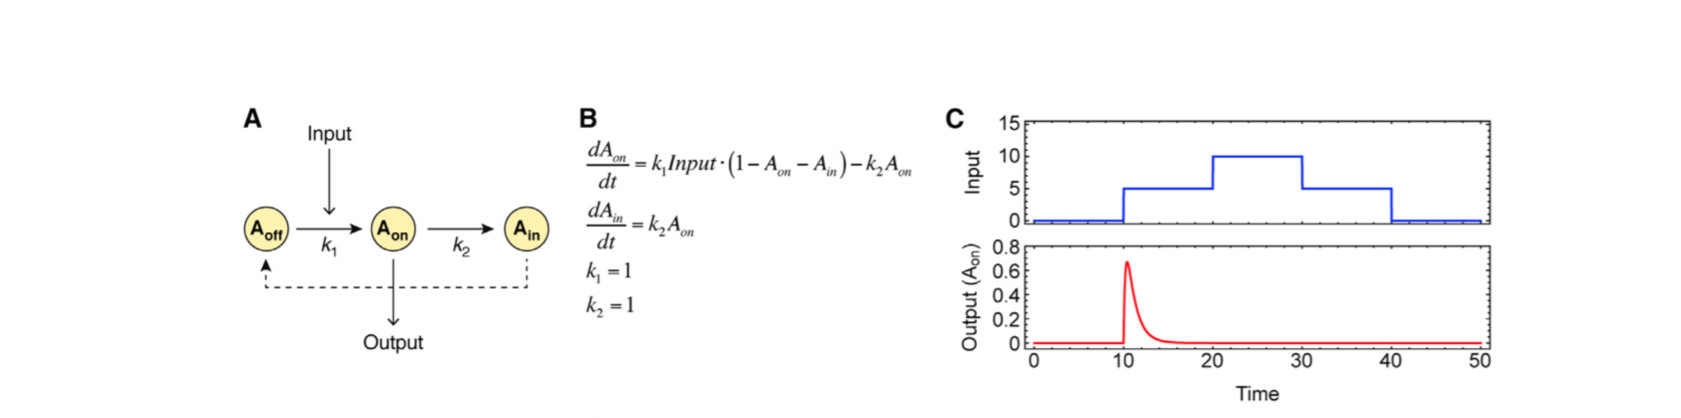



Se redefinieron las ecuaciones diferenciales que gobiernan el sistema de la siguiente manera:

$$
\begin{align}
\frac{dA_{off}}{dt} &= k_3 \cdot A_{in} - k_1 \cdot A_{off} \cdot Input \\ 
\frac{dA_{on}}{dt} &= k_1 \cdot A_{off} \cdot Input  - k_2 \cdot A_{on} \\
\frac{dA_{in}}{dt} &= k_2 \cdot A_{on} - k_3 \cdot A_{in} \\
\end{align}
$$

In [1]:
# Definición de la función

def Toilet_Flush(u, t, k1, k2, k3):
    A_off, A_on, A_in = u
    
    if t <= 10:
        Input = 0
    elif t > 10 and t <= 25:
        Input = 12*(np.ceil((t-10)/10)/2)
    elif t == tspan[-1]:
        Input = 0
    else:
        Input = 12*(np.ceil((40-t)/10)/2)
        
    dA_off = k3*A_in - k1*A_off*Input
    dA_on = k1*A_off*Input - k2*A_on 
    dA_in = k2*A_on - k3*A_in
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
    return dA_off, dA_on, dA_in



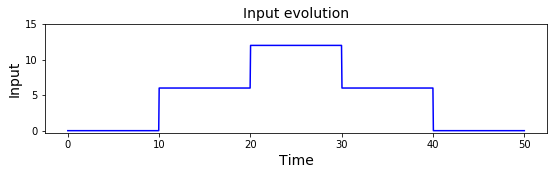

In [4]:
# Plotear el input:

lista_Input=list()

for t in tspan:
    if t <= 10:
        Input = 0
    elif t > 10 and t <= 25:
        Input = 12*(np.ceil((t-10)/10)/2)
    elif t == tspan[-1]:
        Input = 0
    else:
        Input = 12*(np.ceil((40-t)/10)/2)
        
    lista_Input.append(Input)
    
plt.figure(figsize = (9, 2))
plt.ylim([-0.3,15])
plt.title("Input evolution", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.ylabel("Input", fontsize = 14)
plt.plot(tspan, lista_Input, "b")
plt.show()

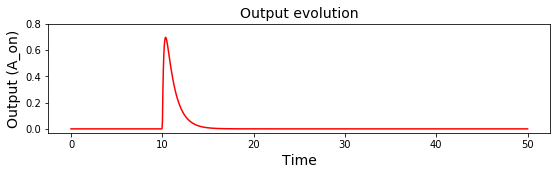

In [5]:
# Plotear el output:

plt.figure(figsize = (9, 2))
plt.ylim([-0.03,0.8])

sol = odeint(Toilet_Flush, u, tspan, p)
plt.plot(tspan, sol[:,1], "r")
plt.title("Output evolution", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.ylabel("Output (A_on)", fontsize = 14)
plt.show()

### Cambios en k1

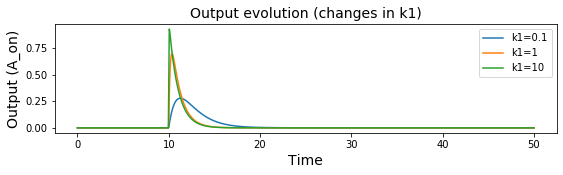

In [6]:
plt.figure(figsize = (9, 2))

for p in [(0.1,1,0),(1,1,0),(10,1,0)]:
    sol = odeint(Toilet_Flush, u, tspan, p)
    plt.plot(tspan, sol[:,1], label="k1="+str(p[0]))
    plt.title("Output evolution (changes in k1)", fontsize = 14)
    plt.xlabel("Time", fontsize = 14)
    plt.ylabel("Output (A_on)", fontsize = 14)
plt.legend()
plt.show()

Conforme aumenta k1 la respuesta tiene una intensidad mayor (se observa una mayor concentración de A_on) y es más breve en el tiempo.

### Cambios en k2

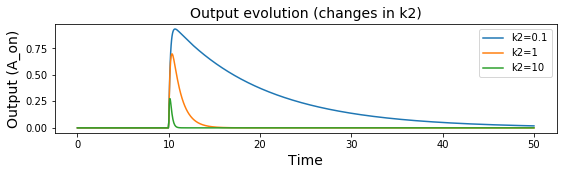

In [7]:
plt.figure(figsize = (9, 2))

for p in [(1,0.1,0),(1,1,0),(1,10,0)]:
    sol = odeint(Toilet_Flush, u, tspan, p)
    plt.plot(tspan, sol[:,1], label="k2="+str(p[1]))
    plt.title("Output evolution (changes in k2)", fontsize = 14)
    plt.xlabel("Time", fontsize = 14)
    plt.ylabel("Output (A_on)", fontsize = 14)
plt.legend()
plt.show()

Conforme aumenta k2 la respuesta tiene una intensidad menor (se observa una menor concentración de A_on) y también tiene una duración menor.

### Cambios en k3

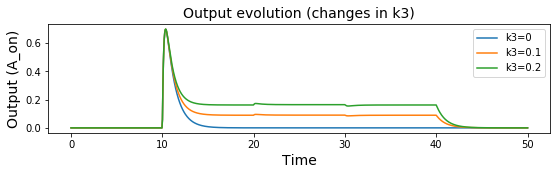

In [8]:
plt.figure(figsize = (9, 2))

for p in [(1,1,0),(1,1,0.1),(1,1,0.2)]:
    sol = odeint(Toilet_Flush, u, tspan, p)
    plt.plot(tspan, sol[:,1], label="k3="+str(p[2]))
    plt.title("Output evolution (changes in k3)", fontsize = 14)
    plt.xlabel("Time", fontsize = 14)
    plt.ylabel("Output (A_on)", fontsize = 14)
plt.legend()
plt.show()

#### Establecimiento de un input con menor tiempo entre pulsos para visualizar mejor el resultado:

In [9]:
# Definición de la función

def Toilet_Flush(u, t, k1, k2, k3):
    A_off, A_on, A_in = u
    
    if t <= 7:
        Input = 0
    elif t > 7 and t <= 25:
        Input = np.ceil((t-7)/7)
    elif t == tspan[-1]:
        Input = 0
    else:
        Input = np.ceil((43-t)/7)
        
    dA_off = k3*A_in - k1*A_off*Input
    dA_on = k1*A_off*Input - k2*A_on 
    dA_in = k2*A_on - k3*A_in
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
    return dA_off, dA_on, dA_in

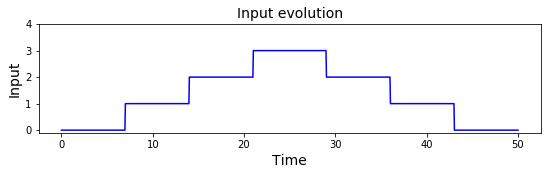

In [10]:
# Plotear el input:

lista_Input=list()

for t in tspan:
    
    if t <= 7:
        Input = 0
    elif t > 7 and t <= 25:
        Input = np.ceil((t-7)/7)
    elif t == tspan[-1]:
        Input = 0
    else:
        Input = np.ceil((43-t)/7)
        
    lista_Input.append(Input)
    
plt.figure(figsize = (9, 2))
plt.ylim([-0.1,4])
plt.title("Input evolution", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.ylabel("Input", fontsize = 14)
plt.plot(tspan, lista_Input, "b")
plt.show()

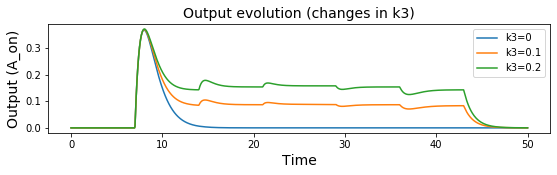

In [11]:
plt.figure(figsize = (9, 2))

for p in [(1,1,0),(1,1,0.1),(1,1,0.2)]:
    sol = odeint(Toilet_Flush, u, tspan, p)
    plt.plot(tspan, sol[:,1], label="k3="+str(p[2]))
    plt.title("Output evolution (changes in k3)", fontsize = 14)
    plt.xlabel("Time", fontsize = 14)
    plt.ylabel("Output (A_on)", fontsize = 14)
plt.legend()
plt.show()

Conforme aumenta k3, tal y como se esperaba, el sistema pierde la capacidad de adaptación perfecta y, además, comienza a responder a los inputs en escalera (pues la cantidad de A_off se recupera a tiempo para responder al siguiente input), dejando de presentar una única respuesta.

Se pierde la adaptación perfecta y además hay múltiples pulsos.


## 2.  Multiple output pulses

En este caso se introduce una variable nueva (proteína B) que simula el input y que está en menor concentración que A_off de manera que no la consume por completo en la primera respuesta, permitiendo que se produzcan multiples pulsos de respuesta ante el input que aumenta en escalera. 


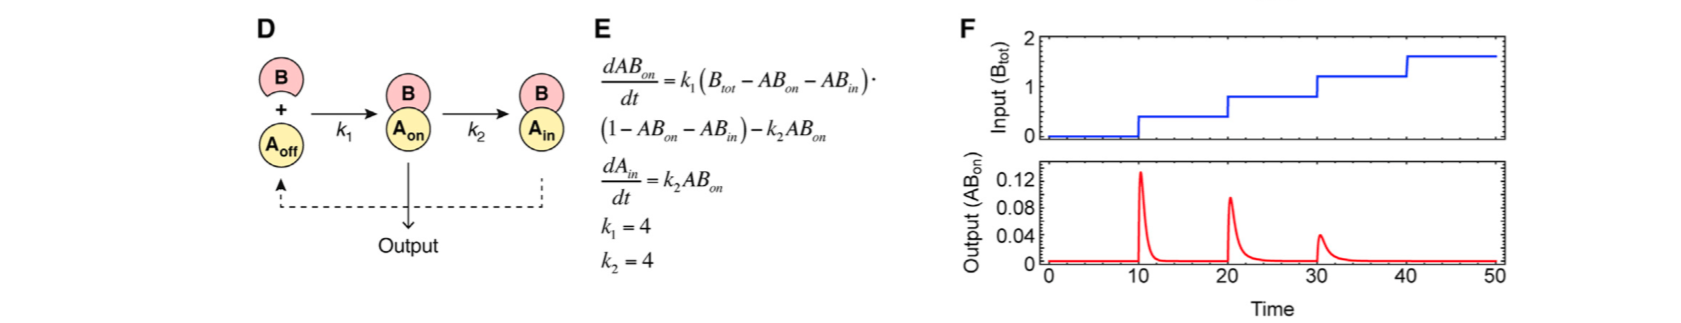


Se redefinieron las ecuaciones diferenciales que gobiernan el sistema de la siguiente manera:

$$
\begin{align}
\frac{dA_{off}}{dt} &= k_3 \cdot AB_{in} - k_1 \cdot (B_{tot} - AB_{on} - AB_{in})\cdot A_{off} \\ 
\frac{dAB_{on}}{dt} &= k_1 \cdot (B_{tot} - AB_{on} - AB_{in}) \cdot A_{off}  - k_2 \cdot AB_{on} \\
\frac{dAB_{in}}{dt} &= k_2 \cdot AB_{on} - k_3 \cdot AB_{in} \\
\end{align}
$$

In [12]:
def sistema_B_tot(u, t, k1, k2, k3):
    A_off, AB_on, AB_in = u
    
    if t <= 10:
        B_tot = 0
    else:
        B_tot = (np.ceil((t-10)/10)/2.5)
        
    dA_off = k3*AB_in - k1*(B_tot - AB_on - AB_in)*A_off
    dAB_on = k1*(B_tot - AB_on - AB_in)*A_off - k2*AB_on 
    dAB_in = k2*AB_on - k3*AB_in
    
    return dA_off, dAB_on, dAB_in

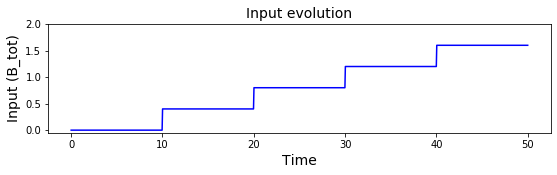

In [13]:
# Plotear el input:

lista_Input=list()

for t in tspan:
    
    if t <= 10:
        B_tot = 0
    else:
        B_tot = (np.ceil((t-10)/10)/2.5)
    lista_Input.append(B_tot)
    
plt.figure(figsize = (9, 2))
plt.ylim([-0.05,2])

plt.title("Input evolution", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.ylabel("Input (B_tot)", fontsize = 14)
plt.plot(tspan, lista_Input, "b")
plt.show()


In [14]:
# Parametros del paper 

k1=4
k2=4
k3=0
p = (k1, k2, k3)

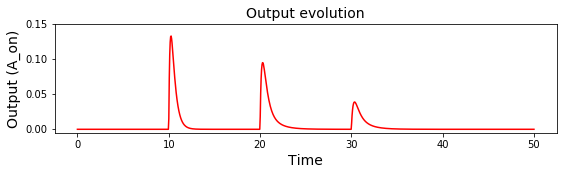

In [15]:
# Plotear el output:

plt.figure(figsize = (9, 2))
plt.ylim([-0.005,0.15])

sol = odeint(sistema_B_tot, u, tspan, p)
plt.plot(tspan, sol[:,1], "r")
plt.title("Output evolution", fontsize = 14)
plt.xlabel("Time", fontsize = 14)
plt.ylabel("Output (A_on)", fontsize = 14)
plt.show()

### Cambios en k1

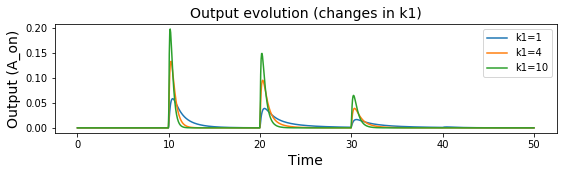

In [16]:
plt.figure(figsize = (9, 2))

for p in [(1,4,0),(4,4,0),(10,4,0)]:
    sol = odeint(sistema_B_tot, u, tspan, p)
    plt.plot(tspan, sol[:,1], label="k1="+str(p[0]))
    plt.title("Output evolution (changes in k1)", fontsize = 14)
    plt.xlabel("Time", fontsize = 14)
    plt.ylabel("Output (A_on)", fontsize = 14)
plt.legend()
plt.show()

### Cambios en k2

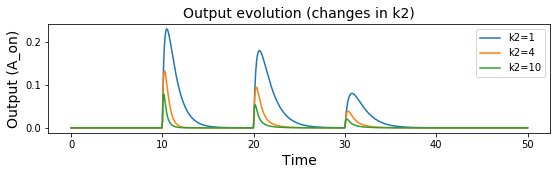

In [17]:
plt.figure(figsize = (9, 2))

for p in [(4,1,0),(4,4,0),(4,10,0)]:
    sol = odeint(sistema_B_tot, u, tspan, p)
    plt.plot(tspan, sol[:,1], label="k2="+str(p[1]))
    plt.title("Output evolution (changes in k2)", fontsize = 14)
    plt.xlabel("Time", fontsize = 14)
    plt.ylabel("Output (A_on)", fontsize = 14)
plt.legend()
plt.show()

### Cambios en k3

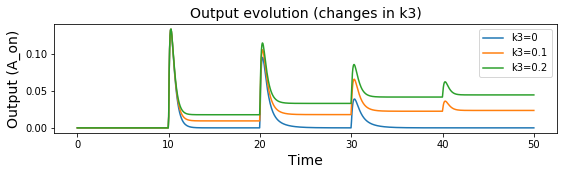

In [18]:
plt.figure(figsize = (9, 2))

for p in [(4,4,0),(4,4,0.1),(4,4,0.2)]:
    sol = odeint(sistema_B_tot, u, tspan, p)
    plt.plot(tspan, sol[:,1], label="k3="+str(p[2]))
    plt.title("Output evolution (changes in k3)", fontsize = 14)
    plt.xlabel("Time", fontsize = 14)
    plt.ylabel("Output (A_on)", fontsize = 14)
plt.legend()
plt.show()

Conforme aumenta k3 la adaptación del sistema es cada vez peor, no siendo capaz de volver a la concentración de A_on de 0. 